In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 소개 : <a href='Food.com'>Food.</a>


### 컬럼 정보

- id : Recipe ID
- minutes : Minutes to prepare recipe
- contributor_id : User ID who submitted this recipe
- submitted : Date recipe was submitted
- tags : Food.com tags for recipe
- nutrition : Nutrition information (calories (#), total fat (PDV), sugar (PDV) , sodium (PDV) , protein (PDV) , saturated fat (PDV) , and carbohydrates (PDV))
- n_steps : Number of steps in recipe
- steps : Text for recipe steps, in order
- description : User-provided description
- ingredients : List of ingredient names
- n_ingredients : Number of ingredients

















In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -qq '/content/drive/MyDrive/Colab Notebooks/Data Project/Data/Recipes/Recipes_and_Interactions.zip' -d './dataset'

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./dataset/RAW_recipes.csv')

In [ ]:
df.head()

name      id  minutes  \
0  arriba   baked winter squash mexican style  137739       55   
1            a bit different  breakfast pizza   31490       30   
2                   all in the kitchen  chili  112140      130   
3                          alouette  potatoes   59389       45   
4          amish  tomato ketchup  for canning   44061      190   

   contributor_id   submitted  \
0           47892  2005-09-16   
1           26278  2002-06-17   
2          196586  2005-02-25   
3           68585  2003-04-14   
4           41706  2002-10-25   

                                                tags  \
0  ['60-minutes-or-less', 'time-to-make', 'course...   
1  ['30-minutes-or-less', 'time-to-make', 'course...   
2  ['time-to-make', 'course', 'preparation', 'mai...   
3  ['60-minutes-or-less', 'time-to-make', 'course...   
4  ['weeknight', 'time-to-make', 'course', 'main-...   

                                    nutrition  n_steps  \
0       [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]       11   
1   [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]        9   
2  [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]        6   
3   [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]       11   
4   [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]        5   

                                               steps  \
0  ['make a choice and proceed with recipe', 'dep...   
1  ['preheat oven to 425 degrees f', 'press dough...   
2  ['brown ground beef in large pot', 'add choppe...   
3  ['place potatoes in a large pot of lightly sal...   
4  ['mix all ingredients& boil for 2 1 / 2 hours ...   

                                         description  \
0  autumn is my favorite time of year to cook! th...   
1  this recipe calls for the crust to be prebaked...   
2  this modified version of 'mom's' chili was a h...   
3  this is a super easy, great tasting, make ahea...   
4  my dh's amish mother raised him on this recipe...   

                                         ingredients  n_ingredients  
0  ['winter squash', 'mexican seasoning', 'mixed ...              7  
1  ['prepared pizza crust', 'sausage patty', 'egg...              6  
2  ['ground beef', 'yellow onions', 'diced tomato...             13  
3  ['spreadable cheese with garlic and herbs', 'n...             11  
4  ['tomato juice', 'apple cider vinegar', 'sugar...              8

### EDA

### 데이터 확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


### 결측치 확인

In [ ]:
df.isnull().sum()

name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

####  요리명이 결측치인 값을 레시피 ID(368257)를 이용하여 Food.com 에서 요리명을 찾아 대체해줌

In [ ]:
df.loc[df['name'].isna()]

name      id  minutes  contributor_id   submitted  \
721  NaN  368257       10          779451  2009-04-27   

                                                  tags  \
721  ['15-minutes-or-less', 'time-to-make', 'course...   

                                         nutrition  n_steps  \
721  [1596.2, 249.0, 155.0, 0.0, 2.0, 112.0, 14.0]        6   

                                                 steps    description  \
721  ['in a bowl , combine ingredients except for o...  -------------   

                                           ingredients  n_ingredients  
721  ['lemon', 'honey', 'horseradish mustard', 'gar...             10

In [ ]:
df.loc[df['name'].isna(), 'name'] = 'Salad Dressings'
df.loc[df['id']==368257]

name      id  minutes  contributor_id   submitted  \
721  Salad Dressings  368257       10          779451  2009-04-27   

                                                  tags  \
721  ['15-minutes-or-less', 'time-to-make', 'course...   

                                         nutrition  n_steps  \
721  [1596.2, 249.0, 155.0, 0.0, 2.0, 112.0, 14.0]        6   

                                                 steps    description  \
721  ['in a bowl , combine ingredients except for o...  -------------   

                                           ingredients  n_ingredients  
721  ['lemon', 'honey', 'horseradish mustard', 'gar...             10

### nutrition

nutrition : Nutrition information (calories (#), total fat (PDV), sugar (PDV) , sodium (PDV) , protein (PDV) , saturated fat (PDV) , and carbohydrates (PDV))

In [ ]:
df[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']] = df.nutrition.str.split(",",expand=True)

In [ ]:
df['calories'] =  df['calories'].apply(lambda x: x.replace('[',''))

In [ ]:
df['carbohydrates (PDV)'] =  df['carbohydrates (PDV)'].apply(lambda x: x.replace(']',''))

In [ ]:
df[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']] = df[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']].astype('float')

In [ ]:
df.dtypes

name                    object
id                       int64
minutes                  int64
contributor_id           int64
submitted               object
tags                    object
nutrition               object
n_steps                  int64
steps                   object
description             object
ingredients             object
n_ingredients            int64
calories               float64
total fat (PDV)        float64
sugar (PDV)            float64
sodium (PDV)           float64
protein (PDV)          float64
saturated fat (PDV)    float64
carbohydrates (PDV)    float64
dtype: object

In [ ]:
df.head()

name      id  minutes  \
0  arriba   baked winter squash mexican style  137739       55   
1            a bit different  breakfast pizza   31490       30   
2                   all in the kitchen  chili  112140      130   
3                          alouette  potatoes   59389       45   
4          amish  tomato ketchup  for canning   44061      190   

   contributor_id   submitted  \
0           47892  2005-09-16   
1           26278  2002-06-17   
2          196586  2005-02-25   
3           68585  2003-04-14   
4           41706  2002-10-25   

                                                tags  \
0  ['60-minutes-or-less', 'time-to-make', 'course...   
1  ['30-minutes-or-less', 'time-to-make', 'course...   
2  ['time-to-make', 'course', 'preparation', 'mai...   
3  ['60-minutes-or-less', 'time-to-make', 'course...   
4  ['weeknight', 'time-to-make', 'course', 'main-...   

                                    nutrition  n_steps  \
0       [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]       11   
1   [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]        9   
2  [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]        6   
3   [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]       11   
4   [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]        5   

                                               steps  \
0  ['make a choice and proceed with recipe', 'dep...   
1  ['preheat oven to 425 degrees f', 'press dough...   
2  ['brown ground beef in large pot', 'add choppe...   
3  ['place potatoes in a large pot of lightly sal...   
4  ['mix all ingredients& boil for 2 1 / 2 hours ...   

                                         description  \
0  autumn is my favorite time of year to cook! th...   
1  this recipe calls for the crust to be prebaked...   
2  this modified version of 'mom's' chili was a h...   
3  this is a super easy, great tasting, make ahea...   
4  my dh's amish mother raised him on this recipe...   

                                         ingredients  n_ingredients  calories  \
0  ['winter squash', 'mexican seasoning', 'mixed ...              7      51.5   
1  ['prepared pizza crust', 'sausage patty', 'egg...              6     173.4   
2  ['ground beef', 'yellow onions', 'diced tomato...             13     269.8   
3  ['spreadable cheese with garlic and herbs', 'n...             11     368.1   
4  ['tomato juice', 'apple cider vinegar', 'sugar...              8     352.9   

   total fat (PDV)  sugar (PDV)  sodium (PDV)  protein (PDV)  \
0              0.0         13.0           0.0            2.0   
1             18.0          0.0          17.0           22.0   
2             22.0         32.0          48.0           39.0   
3             17.0         10.0           2.0           14.0   
4              1.0        337.0          23.0            3.0   

   saturated fat (PDV)  carbohydrates (PDV)  
0                  0.0                  4.0  
1                 35.0                  1.0  
2                 27.0                  5.0  
3                  8.0                 20.0  
4                  0.0                 28.0

### 컬럼 삭제

필요없는 컬럼 삭제

In [ ]:
df.drop(['id', 'contributor_id','submitted','tags','nutrition', 'description'], axis=1,inplace = True)
df[:3]

name  minutes  n_steps  \
0  arriba   baked winter squash mexican style       55       11   
1            a bit different  breakfast pizza       30        9   
2                   all in the kitchen  chili      130        6   

                                               steps  \
0  ['make a choice and proceed with recipe', 'dep...   
1  ['preheat oven to 425 degrees f', 'press dough...   
2  ['brown ground beef in large pot', 'add choppe...   

                                         ingredients  n_ingredients  calories  \
0  ['winter squash', 'mexican seasoning', 'mixed ...              7      51.5   
1  ['prepared pizza crust', 'sausage patty', 'egg...              6     173.4   
2  ['ground beef', 'yellow onions', 'diced tomato...             13     269.8   

   total fat (PDV)  sugar (PDV)  sodium (PDV)  protein (PDV)  \
0              0.0         13.0           0.0            2.0   
1             18.0          0.0          17.0           22.0   
2             22.0         32.0          48.0           39.0   

   saturated fat (PDV)  carbohydrates (PDV)  
0                  0.0                  4.0  
1                 35.0                  1.0  
2                 27.0                  5.0

### ingredients 컬럼

**여러가지 형태로 식재료가 표현 됨**

- prepared pizza crust
- salt and pepper
- yellow onions
- diced tomatoes, ground cumin, ground beef
- new potatoes, fresh garlic
- rotel tomatoes (통조림 상품명)




In [ ]:
df[['name','ingredients']][:10]

name  \
0  arriba   baked winter squash mexican style   
1            a bit different  breakfast pizza   
2                   all in the kitchen  chili   
3                          alouette  potatoes   
4          amish  tomato ketchup  for canning   
5                     apple a day  milk shake   
6                       aww  marinated olives   
7              backyard style  barbecued ribs   
8                    bananas 4 ice cream  pie   
9                     beat this  banana bread   

                                         ingredients  
0  ['winter squash', 'mexican seasoning', 'mixed ...  
1  ['prepared pizza crust', 'sausage patty', 'egg...  
2  ['ground beef', 'yellow onions', 'diced tomato...  
3  ['spreadable cheese with garlic and herbs', 'n...  
4  ['tomato juice', 'apple cider vinegar', 'sugar...  
5  ['milk', 'vanilla ice cream', 'frozen apple ju...  
6  ['fennel seeds', 'green olives', 'ripe olives'...  
7  ['pork spareribs', 'soy sauce', 'fresh garlic'...  
8  ['chocolate sandwich style cookies', 'chocolat...  
9  ['sugar', 'unsalted butter', 'bananas', 'eggs'...

In [ ]:
import pandas as pd
import re
import ast

#### 모든 식재료 리스트

In [ ]:
# 데이터 프레임의 'ingredients' 컬럼의 각 행의 리스트들을 하나의 리스트로 합치기
combined_list = [ingredient for ingredients_list in df['ingredients'] for ingredient in ast.literal_eval(ingredients_list)]

# 중복 제거
unique_ingredients_list = list(set(combined_list))
unique_ingredients_list[:10]

['unsweetened raspberry kool-aid',
 'elephant',
 '98% fat-free cream of chicken soup',
 'sardines',
 'squid',
 'hungry jack big flaky refrigerated biscuits',
 'sugar cane',
 'fresh jalapeno',
 'mapleine',
 'old-fashioned quaker oats']

#### Special Word

영어를 제외한 특수 문자 포함

  ! " % & ' ( ) * , - . / 0 1 2 3 4 5 6 7 8 9 ?


```
'nice & cheesy cheese',
 'good seasons cheese & garlic salad dressing mix',
 'garlic & herb salad dressing mix',
 'betty crocker rich & creamy chocolate ready to spread frosting',
 '9 in. unbaked pastry shells',
 'jar (1 lb. 8 oz.) chunky tomato garlic and onion sauce',
 'potato & cheese pierogi',
 'sea salt & fresh black pepper',
 'condensed chicken broth with garlic & herbs',
 'm & m mint chocolate candies',
 '6 inch fat-free whole wheat pita bread'

```

In [ ]:
spcial_words = ' '.join(sorted([char for char in set(' '.join(unique_ingredients_list)) if re.findall('[^A-Za-z]', char)]))
spcial_words

'  ! " % & \' ( ) * , - . / 0 1 2 3 4 5 6 7 8 9 ?'

In [ ]:
# [word for word in unique_ingredients_list if word.split() in spcial_words]
filtered_ingredients = [word for word in unique_ingredients_list if any(w in spcial_words for w in word.split())]
filtered_ingredients[:10]

['lea & perrins worcestershire sauce',
 'lea & perrins white wine worcestershire sauce',
 'condensed cream of mushroom & garlic soup',
 'simply potatoes rosemary & garlic red potato wedges',
 'tomato & onion soup mix',
 'betty crocker rich & creamy chocolate ready to spread frosting',
 'ragu chunky tomato onion & garlic sauce',
 'tall slender 4 cup container',
 'prego extra chunky mushroom & diced tomato spaghetti sauce',
 'good seasons cheese & garlic salad dressing mix']

#### Hyphens ( - )

```
'kool-aid',
 'non-fat vanilla frozen yogurt',
 'ro-tel mexican festival tomatoes',
 'stir-fry sauce with garlic and ginger',
 'cheese-filled egg tortellini',
 'salsa-style tomatoes',
 'low-fat quark cheese',
 'full-fat milk',
 '9-inch deep dish pie crusts',
 'polly-o natural part skim ricotta cheese'
```

In [ ]:
hyphens_list = list(set([ingredient for ingredient in unique_ingredients_list if re.findall('-', ingredient)]))
hyphens_list[:10]

['unsweetened raspberry kool-aid',
 'low-sodium worcestershire sauce',
 '98% fat-free cream of chicken soup',
 'low-fat frozen yogurt',
 'organic no-sugar-added cranberry juice',
 'no-salt-added italian-style tomatoes',
 'cooked medium-grain rice',
 'old-fashioned quaker oats',
 'fat free low-sodium beef broth',
 'broiler-fryer chicken']

#### Number
```
'7-up soda',
 '98% fat-free cream of chicken soup',
 'omega 3 6 9 oil',
 '98% fat-free cheddar cheese soup',
 'plain 1% yogurt',
 '98% fat-free honey ham',
 '85% lean ground beef',
 '8-inch 97% fat free flour tortillas',
 '7 bean mix',
 'cherry 7-up'

```

In [ ]:
number_list = list(set([ingredient for ingredient in unique_ingredients_list if re.findall('[0-9]', ingredient)]))
number_list[:10]

['98% fat-free cream of chicken soup',
 'sugar free 7-up',
 '98% fat-free honey ham',
 '2% fat cottage cheese',
 '9 inch cake layers',
 '85% lean ground beef',
 'kraft 2% american cheese singles',
 '9-inch low-fat chocolate graham cracker crust',
 '6-inch pitas',
 '8-inch ready-made graham cracker crust']

### Unit

'inch', 'ounce', '%', 'piece'

In [ ]:
units = ['inch', 'ounce', '%', 'piece']
filtered_ingredients = [word for word in unique_ingredients_list if any(unit in word for unit in units)]
filtered_ingredients[:10]

['98% fat-free cream of chicken soup',
 "reese's pieces",
 'crystallized melon pieces',
 '2% milk',
 'masterpiece original barbecue sauce',
 '9-inch double-crust pie shells',
 'semisweet chocolate piece',
 '92% lean ground beef',
 '10-inch flour tortillas',
 '9-inch low-fat chocolate graham cracker crust']

#### Style, Type, reciepe

In [ ]:
filtered_ingredients = [word for word in unique_ingredients_list if any(unit in word for unit in ['style', 'type'])]
filtered_ingredients[:10]

['monterey jack-style soy cheese',
 'kraft mexican style finely shredded four cheese',
 'mexican-style stewed tomatoes with jalapeno peppers',
 'frozen gumbo-style vegetables',
 'steak-style french fries',
 'cajun-style stewed tomatoes',
 'frozen asian-style vegetables',
 'country-style spareribs',
 'italian-style tomato sauce',
 'italian-style tomato paste']

In [ ]:
filtered_ingredients = [word for word in unique_ingredients_list if any(unit in word for unit in ['recipe','recipes'])]
filtered_ingredients

['duncan hines moist deluxe butter recipe fudge cake mix',
 'recipe amaretto frosting',
 'progresso recipe starters fire roasted tomato cooking sauce',
 'recipe basic meatballs',
 'lipton recipe secrets onion soup mix',
 'recipe pizza dough',
 'progresso recipe starters creamy three cheese cooking sauce',
 'meatloaf recipe',
 'lipton recipe secrets savory herb with garlic soup mix',
 'basic mayonnaise recipe',
 'recipe of basic meatballs',
 'butter recipe cake mix',
 'morningstar farms meal starters grillers recipe crumbles',
 'pillsbury crescent recipe creations refrigerated flaky dough sheet',
 'mrs. grass homestyle vegetable recipe',
 'recipe cream filling']

### ingredients 컬럼 전처리

1. 특수문자, 숫자 제거
2. style, type  포함 텍스트 제거
3. 'recipe','recipes' 제거
4. 관사 제거


In [ ]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
def preprocessed_text(input_text):
    # 특수 기호, 숫자 제거
    remove_special_words = ''.join([char for char in input_text if not re.findall('[^A-Za-z\s]', char)])
    remove_text = ['style', 'type', 'recipe', 'recipes']
    words = remove_special_words.split()
    result_words = [word for word in words if not any(remove in word for remove in remove_text)]
    result_text = ' '.join(result_words)

    # 관사 제거
    words = word_tokenize(result_text.lower())
    tagged_words = nltk.pos_tag(words)
    filtered_words = [word for word, pos in tagged_words if pos not in ['DT']]

    result_text = ' '.join(filtered_words)

    return result_text


### 1. 식재료들을 단어로 분리하여 빈도수 확인

In [ ]:
# 재료 데이터 추출 및 전처리
from itertools import chain
from collections import Counter

combined_list = [ingredient for ingredients_list in df['ingredients'] for ingredient in ast.literal_eval(ingredients_list)]
# 중복 제거
unique_ingredients_list = list(set(combined_list))
preprocess_list = []

# 데이터 전처리
for ingredient in unique_ingredients_list:
  preprocess_list.append(preprocessed_text(ingredient))

# 단어로 분리
split_data = list(chain(*[element.split() for element in preprocess_list]))

# 빈도 계산
ingredient_counts = Counter(split_data)

sorted_ingredients = sorted(ingredient_counts.items(), key=lambda x: x[1], reverse=True)

# 식재료와 개수 분리
ingredients, counts = zip(*sorted_ingredients)
sorted_ingredients[:30]


[('mix', 649),
 ('cheese', 565),
 ('sauce', 449),
 ('chocolate', 445),
 ('and', 361),
 ('chicken', 356),
 ('dried', 328),
 ('cream', 323),
 ('red', 305),
 ('frozen', 289),
 ('beef', 284),
 ('white', 265),
 ('fresh', 256),
 ('pepper', 251),
 ('juice', 250),
 ('with', 247),
 ('soup', 243),
 ('whole', 239),
 ('green', 234),
 ('bread', 217),
 ('pork', 207),
 ('rice', 204),
 ('beans', 203),
 ('powder', 201),
 ('garlic', 200),
 ('of', 188),
 ('sweet', 182),
 ('tomato', 178),
 ('butter', 177),
 ('lowfat', 175)]

### Ingredients 시각화

 #### WordCloud

In [ ]:
import ast
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import plotly.express as px

In [ ]:
def configure_plotly_browser_state(): #colab 에서 plotly 그래표 표시하기 위한 함수
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))


#### WordCloud

In [ ]:
from wordcloud import WordCloud

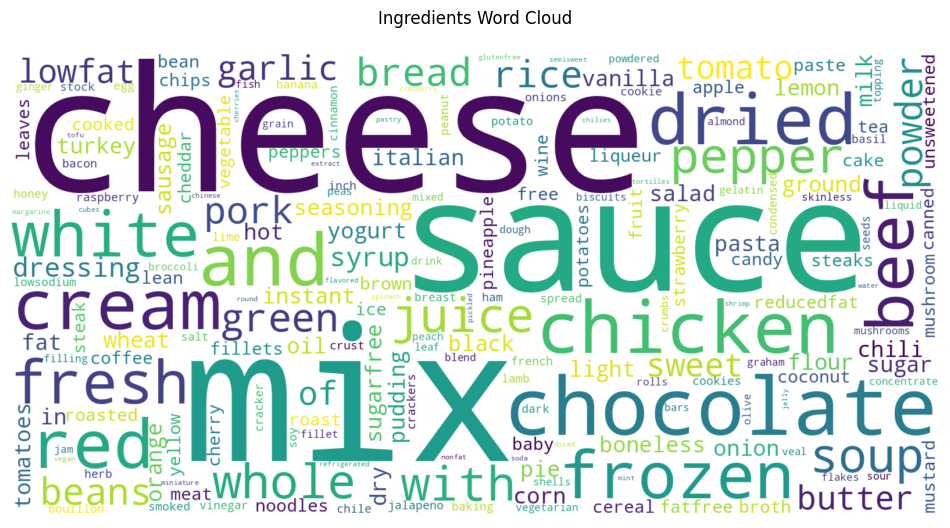

In [ ]:
wordcloud = WordCloud(width=800, height=400,
                      max_words=200,
                      scale=2, # 화질 조정 : 2배로 글자 확대
                      random_state=42,
                      background_color='white').generate_from_frequencies(ingredient_counts)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Ingredients Word Cloud\n')
plt.show();

#### Bar Plot

In [ ]:
configure_plotly_browser_state()
pio.renderers.default = 'notebook'
# init_notebook_mode(connected=False)

fig = px.bar(x = ingredients[:30], y=counts[:30], color=counts[:30])
fig.update_layout(title='Ingredient Counts')
fig.update_xaxes(title='Ingredient')
fig.update_yaxes(title='Counts')

fig.show()

### Ingredients 다시 전처리
#### 색을 의미하는 단어, 접속사, 전치사, 동사, 형용사 (+ MIX)도 제외하여 전처리

In [ ]:
def preprocessed_text_NN(input_text):
    # 특수 기호 제거
    remove_special_words = ''.join([char for char in input_text if not re.findall('[^A-Za-z\s]', char)])
    remove_text = ['style', 'type', 'recipe', 'recipes']
    words = remove_special_words.split()
    result_words = [word for word in words if not any(remove in word for remove in remove_text)]
    result_text = ' '.join(result_words)

    # 전치사, 접속서, 동사, 형용사 제거
    words = word_tokenize(result_text.lower())
    tagged_words = nltk.pos_tag(words)
    # filtered_words = [word for word, pos in tagged_words if pos not in ['DT', 'IN','CC','VB', 'VBD', 'JJ', ]]
    # 명사만 추출
    filtered_words = [word for word, pos in tagged_words if pos in ['NN', 'NNS' ]]

    result_text = ' '.join(filtered_words)


    # 색을 의미하는 단어 제거 + mix
    color_names = ['red', 'blue', 'green', 'yellow', 'purple', 'brown', 'black', 'white', 'pink', 'gray', 'grey', 'mix']

    # Regular expression pattern to match color names (case-insensitive)
    pattern = r'\b(?:' + '|'.join(color_names) + r')\b'

    # Use re.sub() to replace color names with an empty string
    result_text = re.sub(pattern, '', result_text, flags=re.IGNORECASE)


    return result_text

In [ ]:
# 재료 데이터 추출 및 전처리
from itertools import chain
from collections import Counter
preprocess_list = []
# 데이터 전처리
for ingredient in unique_ingredients_list:
  preprocess_list.append(preprocessed_text_NN(ingredient))

# 단어로 분리
split_data = list(chain(*[element.split() for element in preprocess_list]))

# 빈도 계산
ingredient_counts2 = Counter(split_data)

sorted_ingredients2 = sorted(ingredient_counts2.items(), key=lambda x: x[1], reverse=True)

# 식재료와 개수 분리
ingredients2, counts2 = zip(*sorted_ingredients2)
sorted_ingredients2[:30]

[('cheese', 475),
 ('chocolate', 434),
 ('sauce', 413),
 ('cream', 322),
 ('chicken', 304),
 ('beef', 284),
 ('juice', 250),
 ('soup', 233),
 ('pepper', 216),
 ('pork', 207),
 ('rice', 203),
 ('beans', 203),
 ('bread', 200),
 ('powder', 199),
 ('butter', 171),
 ('syrup', 169),
 ('wheat', 162),
 ('oil', 162),
 ('tomato', 158),
 ('chili', 157),
 ('vanilla', 154),
 ('ground', 152),
 ('milk', 151),
 ('boneless', 150),
 ('pie', 142),
 ('orange', 139),
 ('sausage', 136),
 ('onion', 136),
 ('flour', 134),
 ('yogurt', 133)]

#### Bar Plot

In [ ]:
configure_plotly_browser_state()

fig = px.bar(x = ingredients2[:30], y=counts2[:30], color=counts2[:30])
fig.update_layout(title='Ingredient Counts')
fig.update_xaxes(title='Ingredient')
fig.update_yaxes(title='Counts')
fig.show()

#### Pie Chart

In [ ]:
configure_plotly_browser_state()

total_ingredients = sum(ingredient_counts2.values())
percentages = [count / total_ingredients * 100 for count in counts]

fig = px.pie(names=ingredients2[:20], values=percentages[:20], title='Ingredient Percentages')
fig.show()

#### Treemap

In [ ]:
configure_plotly_browser_state()

fig = go.Figure(go.Treemap(
    labels=ingredients2[:20],
    parents=[''] * len(ingredients2[:20]),
    values=counts,
    texttemplate="%{label}<br>%{value}",
    hoverinfo='label+value',
))

fig.update_layout(
    title='Ingredient Frequency Treemap',
    margin=dict(l=10, r=10, t=40, b=10),  # Adjust margins for better layout
)



### Clustering

In [ ]:
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
# 식재료 데이터 중 500개 샘플 데이터 생성
random_data = random.sample(unique_ingredients_list, 500)

##### 토크나이저

- '_' 기호 제거
- 숫자 제거
- 관사와 favor, fat, frozen, inch와 같은 카테고리로 나눌 수 없는 단어 제거

In [ ]:
def tokenizer(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # 구두점 제거
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    removewords = {'s', 'the', 'and', 'or', 'a', 'in', 'with', '&', 'favor', 'fat', 'low', 'minute', 'frozen', 'inch', 'of', 'size'}

    # removeword 와 size 가 포함된 모든 단어 제거
    words = [word for word in text.split() if word not in removewords and 'size' not in word]

    return words


In [ ]:
def tokenizer(input_text):
    remove_special_words = ''.join([char for char in input_text if not re.findall('[^A-Za-z\s]', char)])
    remove_text = ['style', 'type', 'recipe', 'recipes', 'minute', 'hour']
    result_text = remove_special_words.split()
    return result_text

In [ ]:
# 전처리된 데이터를 단어로 토큰화한 리스트 생성
token_list = [tokenizer(sentence) for sentence in unique_ingredients_list]
df_token = pd.DataFrame({'ingredients' : unique_ingredients_list,
                          'tokens' :  token_list})

df_token[:30]

ingredients  \
0                      unsweetened raspberry kool-aid   
1                                            elephant   
2                  98% fat-free cream of chicken soup   
3                                            sardines   
4                                               squid   
5         hungry jack big flaky refrigerated biscuits   
6                                          sugar cane   
7                                      fresh jalapeno   
8                                            mapleine   
9                           old-fashioned quaker oats   
10                               serrano chili pepper   
11                                  italian salad kit   
12                                   red sweet pepper   
13                         green peppercorns in brine   
14                          gorgonzola walnut ravioli   
15                                      pumpkin spice   
16  pillsbury grands refrigerated buttermilk biscuits   
17                                honey dijon mustard   
18                                      low carb beer   
19                       cooked chicken breast strips   
20                                             pitaya   
21                           sodium-free chili powder   
22                reduced-fat butter-flavored cracker   
23                                     munchee cheese   
24                       salad elegance seasoning mix   
25                                      paneer cheese   
26                                        buddig beef   
27                          vlasic dill pickle relish   
28                                       low-fat tofu   
29                                       black pepper   

                                               tokens  
0                   [unsweetened, raspberry, koolaid]  
1                                          [elephant]  
2                 [fatfree, cream, of, chicken, soup]  
3                                          [sardines]  
4                                             [squid]  
5   [hungry, jack, big, flaky, refrigerated, biscu...  
6                                       [sugar, cane]  
7                                   [fresh, jalapeno]  
8                                          [mapleine]  
9                        [oldfashioned, quaker, oats]  
10                           [serrano, chili, pepper]  
11                              [italian, salad, kit]  
12                               [red, sweet, pepper]  
13                    [green, peppercorns, in, brine]  
14                      [gorgonzola, walnut, ravioli]  
15                                   [pumpkin, spice]  
16  [pillsbury, grands, refrigerated, buttermilk, ...  
17                            [honey, dijon, mustard]  
18                                  [low, carb, beer]  
19                  [cooked, chicken, breast, strips]  
20                                           [pitaya]  
21                        [sodiumfree, chili, powder]  
22              [reducedfat, butterflavored, cracker]  
23                                  [munchee, cheese]  
24                  [salad, elegance, seasoning, mix]  
25                                   [paneer, cheese]  
26                                     [buddig, beef]  
27                     [vlasic, dill, pickle, relish]  
28                                     [lowfat, tofu]  
29                                    [black, pepper]

In [ ]:
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenizer,lowercase=False)

In [ ]:
# Create the tfidf_matrix using the TfidfVectorizer
tfidf_matrix = tfidf_vectorizer.fit_transform(unique_ingredients_list)
print(tfidf_matrix.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



(14942, 4576)


#### K Means

In [ ]:
# Perform PCA
pca = PCA(n_components=5)
X = pca.fit_transform(tfidf_matrix.toarray())  # Convert sparse matrix to dense array for PCA
pca.explained_variance_ratio_

array([0.00682703, 0.0065574 , 0.00611946, 0.00582651, 0.00535308])

In [ ]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 1)
    sse = []
    for k in iters:
        sse.append(KMeans(n_clusters=k, n_init=10, random_state=20).fit(data).inertia_)
        if k %10 == 0:
          print('Fit {} cclusters'.format(k))

    plt.figure(figsize=(10, 6))
    plt.plot(iters, sse, marker='o')
    plt.xlabel('Cluster Centers')
    plt.xticks(range(0, max_k+1, 20))
    plt.ylabel('SSE')
    plt.title('SSE by Cluster Center Plot')
    plt.show()



**SSE(Sum of Squared Errors)**

클러스터링 알고리즘에서 군집화의 성능을 평가하기 위해 사용되는 지표

SSE는 각 데이터 포인트와 해당 클러스터의 중심 간의 거리를 제곱하여 모두 더한 값으로, 클러스터 내의 데이터들이 중심에 얼마나 가깝게 모여 있는지를 나타냔다.



Fit 10 cclusters
Fit 20 cclusters
Fit 30 cclusters
Fit 40 cclusters
Fit 50 cclusters
Fit 60 cclusters
Fit 70 cclusters
Fit 80 cclusters
Fit 90 cclusters
Fit 100 cclusters


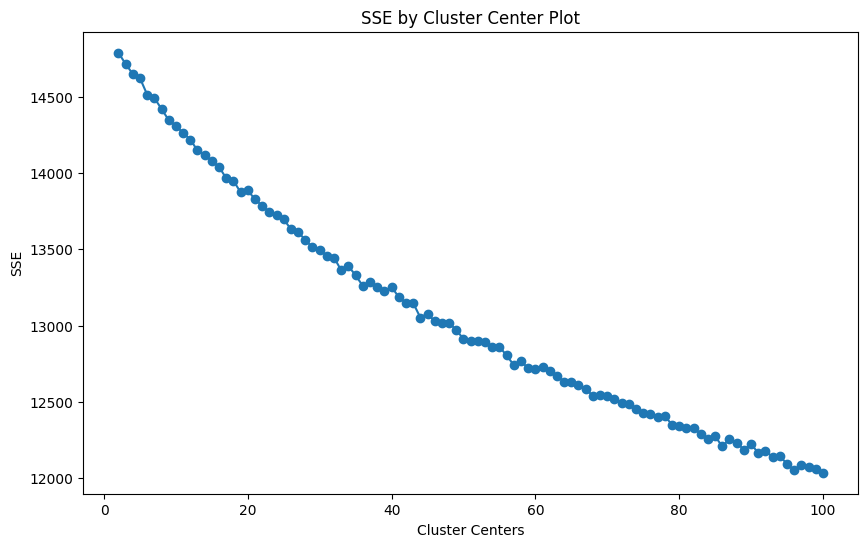

In [ ]:
find_optimal_clusters(tfidf_matrix, 100)

In [ ]:
clusters = KMeans(n_clusters=200, n_init=20, random_state=20).fit_predict(tfidf_matrix)

In [ ]:
df_ingredient = pd.DataFrame({
    'ingredient' : unique_ingredients_list,
    'clusters' : clusters
})

df_ingredient.head()

ingredient  clusters
0      unsweetened raspberry kool-aid        60
1                            elephant       186
2  98% fat-free cream of chicken soup       147
3                            sardines       186
4                               squid       186

In [ ]:
grouped_data = df_ingredient.groupby('clusters')['ingredient'].apply(list)

grouped_data

clusters
0      [black pepper, black caviar, black currant jel...
1      [whipping cream, light cream cheese with chive...
2      [buddig beef, beef kidneys, beef base, beef li...
3      [reduced-sodium chicken flavor stuffing mix, v...
4      [candy cane, chocolate-flavored candy coating,...
                             ...                        
195    [honey dijon mustard, grainy mustard, french d...
196    [deli roast beef, tri-tip roast, roast pork, r...
197    [cheese crackers, matzo crackers, bear shaped ...
198    [chocolate eggs, powdered eggs, extra large eg...
199    [oreo cookie pie crusts, vanilla cookie crumbs...
Name: ingredient, Length: 200, dtype: object

In [ ]:
# 각 클러스터에서 공통으로 등장하는 단어 추출

def get_common_words(data_list):
  common_words = []

  for data in data_list:
    word_sets = [set(words.split()) for words in data]

    # 모든 set들의 교집합을 구하여 공통 단어 추출
    common_word = set.intersection(*word_sets)
    if len(common_word)>0 :
      common_words.append(common_word)

  return common_words


In [ ]:
common_words = get_common_words(grouped_data)
common_words

[{'black'},
 {'cream'},
 {'beef'},
 {'stuffing'},
 {'candy'},
 {'pudding'},
 {'dill'},
 {'jam'},
 set(),
 {'seasoning'},
 set(),
 set(),
 {'fillets'},
 set(),
 {'sauce'},
 set(),
 {'sausage'},
 set(),
 {'oregano'},
 {'dream'},
 {'steak'},
 {'milk'},
 {'loin'},
 {'fish'},
 {'sandwich'},
 {'olives'},
 {'corn'},
 {'stock'},
 {'baking'},
 {'seeds'},
 {'olive'},
 {'herbal'},
 {'pickle'},
 {'tea'},
 {'flour'},
 {'green'},
 set(),
 {'chiles'},
 set(),
 {'cereal'},
 {'ice'},
 {'mushroom'},
 {'apple'},
 set(),
 {'cranberry'},
 set(),
 {'pasta'},
 set(),
 {'chile'},
 {'fat', 'free'},
 set(),
 set(),
 {'wine'},
 {'turkey'},
 {'leaf'},
 {'yogurt'},
 {'liqueur'},
 set(),
 {'chili'},
 {'fruit'},
 {'unsweetened'},
 {'low-sodium'},
 {'vodka'},
 {'cracker'},
 {'sugar'},
 {'mix'},
 {'bouillon'},
 {'salad'},
 {'sesame'},
 set(),
 {'noodles'},
 {'meat'},
 {'cookies'},
 {'rice'},
 set(),
 {'veal'},
 {'hash'},
 {'peach'},
 set(),
 {'potatoes'},
 {'pie'},
 {'plums'},
 {'soy'},
 {'smoked'},
 {'ham'},
 {'shell

#### tokenizr 다시 수행

In [ ]:
def tokenizer(input_text):
    # 특수 기호 제거
    remove_special_words = ''.join([char for char in input_text if not re.findall('[^A-Za-z\s]', char)])
    remove_text = ['style', 'type', 'recipe', 'recipes']
    words = remove_special_words.split()
    result_words = [word for word in words if not any(remove in word for remove in remove_text)]
    result_text = ' '.join(result_words)

    # 전치사, 접속서, 동사, 형용사 제거
    words = word_tokenize(result_text.lower())
    tagged_words = nltk.pos_tag(words)
    # filtered_words = [word for word, pos in tagged_words if pos not in ['DT', 'IN','CC','VB', 'VBD', 'JJ', ]]
    # 명사만 추출
    filtered_words = [word for word, pos in tagged_words if pos in ['NN', 'NNS' ]]

    result_text = ' '.join(filtered_words)


    # 색을 의미하는 단어 제거 + mix
    color_names = ['red', 'blue', 'green', 'yellow', 'purple', 'brown', 'black', 'white', 'pink', 'gray', 'grey', 'mix']

    # Regular expression pattern to match color names (case-insensitive)
    pattern = r'\b(?:' + '|'.join(color_names) + r')\b'

    # Use re.sub() to replace color names with an empty string
    result_text = re.sub(pattern, '', result_text, flags=re.IGNORECASE)

    return result_text.split()


In [ ]:
# 전처리된 데이터를 단어로 토큰화한 리스트 생성
token_list = [tokenizer(sentence) for sentence in unique_ingredients_list]
df_token = pd.DataFrame({'ingredients' : unique_ingredients_list,
                          'tokens' :  token_list})

df_token[:30]

ingredients  \
0                      unsweetened raspberry kool-aid   
1                                            elephant   
2                  98% fat-free cream of chicken soup   
3                                            sardines   
4                                               squid   
5         hungry jack big flaky refrigerated biscuits   
6                                          sugar cane   
7                                      fresh jalapeno   
8                                            mapleine   
9                           old-fashioned quaker oats   
10                               serrano chili pepper   
11                                  italian salad kit   
12                                   red sweet pepper   
13                         green peppercorns in brine   
14                          gorgonzola walnut ravioli   
15                                      pumpkin spice   
16  pillsbury grands refrigerated buttermilk biscuits   
17                                honey dijon mustard   
18                                      low carb beer   
19                       cooked chicken breast strips   
20                                             pitaya   
21                           sodium-free chili powder   
22                reduced-fat butter-flavored cracker   
23                                     munchee cheese   
24                       salad elegance seasoning mix   
25                                      paneer cheese   
26                                        buddig beef   
27                          vlasic dill pickle relish   
28                                       low-fat tofu   
29                                       black pepper   

                                       tokens  
0                                 [raspberry]  
1                                  [elephant]  
2                      [cream, chicken, soup]  
3                                  [sardines]  
4                                     [squid]  
5                     [jack, flaky, biscuits]  
6                               [sugar, cane]  
7                                  [jalapeno]  
8                                  [mapleine]  
9                              [quaker, oats]  
10                           [serrano, chili]  
11                               [salad, kit]  
12                                   [pepper]  
13                       [peppercorns, brine]  
14              [gorgonzola, walnut, ravioli]  
15                           [pumpkin, spice]  
16  [pillsbury, grands, buttermilk, biscuits]  
17                           [honey, mustard]  
18                               [carb, beer]  
19                           [breast, strips]  
20                                   [pitaya]  
21                            [chili, powder]  
22                      [reducedfat, cracker]  
23                          [munchee, cheese]  
24                                 [elegance]  
25                           [paneer, cheese]  
26                             [buddig, beef]  
27                                     [dill]  
28                             [lowfat, tofu]  
29                                   [pepper]

In [ ]:
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenizer,lowercase=False)

In [ ]:
# Create the tfidf_matrix using the TfidfVectorizer
tfidf_matrix = tfidf_vectorizer.fit_transform(unique_ingredients_list)
print(tfidf_matrix.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



(14942, 3663)


In [ ]:
clusters = KMeans(n_clusters=200, n_init=20, random_state=20).fit_predict(tfidf_matrix)

In [ ]:
df_ingredient = pd.DataFrame({
    'ingredient' : unique_ingredients_list,
    'clusters' : clusters
})

df_ingredient.head()

ingredient  clusters
0      unsweetened raspberry kool-aid         4
1                            elephant         4
2  98% fat-free cream of chicken soup        17
3                            sardines         4
4                               squid         4

In [ ]:
grouped_data = df_ingredient.groupby('clusters')['ingredient'].apply(list)

grouped_data

clusters
0      [unsweetened mandarin orange segment, mandarin...
1      [broccoli floret, frozen broccoli spears, froz...
2      [hungry jack big flaky refrigerated biscuits, ...
3      [peach halves in syrup, low-carb maple syrup, ...
4      [unsweetened raspberry kool-aid, elephant, sar...
                             ...                        
195    [cooked lentils, black lentils, split yellow l...
196    [canned shrimp, fresh shrimp, shrimp, tiger sh...
197    [gluten, wheat gluten flour, gluten free bread...
198    [kraft mexican style finely shredded four chee...
199    [2% fat cottage cheese, large curd cottage che...
Name: ingredient, Length: 200, dtype: object

**t-SNE(T-Distributed Stochastic Neighbor Embedding)**

데이터의 고차원 공간에서 가까운 점들을 저차원 공간에서도 가깝게 유지하도록 데이터를 임베딩하는 비선형 차원 축소 기법.

In [ ]:
import plotly.graph_objects as go
import plotly
from plotly.offline import init_notebook_mode, iplot

In [ ]:
tsne = TSNE()
tsne_results = tsne.fit_transform(tfidf_matrix.toarray())

In [ ]:
configure_plotly_browser_state()

trace_Kmeans = go.Scatter(x=X[:, 0], y= X[:, 1], mode="markers",
                    showlegend=False,
                    text = df_ingredient['ingredient'],
                    hoverinfo = 'text',
                    marker=dict(
                            size=8,
                            color = clusters,
                            colorscale = 'Portland',
                            showscale=False,
                            line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        )
                   ))
layout = dict(title = 'KMeans Clustering',
              hovermode= 'closest',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              showlegend= False,
              width=800,
              height=600,
             )

fig1 = go.Figure(data=[trace_Kmeans], layout=layout)
plotly.offline.iplot(fig1)


In [ ]:
# 모든 단어들을 담고 있는 하나의 set 생성
all_words = set()
for word_set in common_words:
    all_words = all_words.union(word_set)

# 하나의 리스트로 변환
all_words_list = list(all_words)

# 결과 출력
print(all_words_list)

['cherries', 'pudding', 'oil', 'vegetables', 'eggs', 'fillets', 'blueberry', 'chicken', 'almonds', 'peanut', 'dressing', 'raisins', 'chives', 'vinegar', 'almond', 'lentils', 'vodka', 'pumpkin', 'sherry', 'juice', 'pie', 'cheddar', 'sausages', 'tortellini', 'blueberries', 'ribs', 'light', 'crust', 'sausage', 'bean', 'corn', 'cereal', 'apple', 'mandarin', 'herb', 'flour', 'salsa', 'sprigs', 'yeast', 'carrots', 'cocoa', 'plums', 'sesame', 'noodles', 'rice', 'bell', 'zest', 'walnuts', 'vanilla', 'peppers', 'salt', 'drink', 'chilies', 'cottage', 'egg', 'vinaigrette', 'cubes', 'ginger', 'blend', 'crackers', 'cream', 'tofu', 'seasoning', 'steak', 'wine', 'barley', 'apricot', 'vegan', 'beef', 'duck', 'cake', 'saffron', 'cheese', 'pineapple', 'dill', 'tomato', 'roast', 'potatoes', 'ham', 'root', 'liqueur', 'pasta', 'sugar', 'mackerel', 'peaches', 'ground', 'steaks', 'liquid', 'cherry', 'sauerkraut', 'stew', 'celery', 'chile', 'tea', 'potato', 'chips', 'kraft', 'apples', 'flakes', 'milk', 'mint'

In [ ]:
configure_plotly_browser_state()

fig = go.Figure(go.Treemap(
    labels=all_words_list[:100],
    parents=[''] * len(all_words_list[:100]),
    values=[1 for i in range(100)],
    texttemplate="%{label}<br>%{value}",
    hoverinfo='label+value',
))

fig.update_layout(
    title='Ingredient Frequency Treemap',
    margin=dict(l=10, r=10, t=40, b=10),  # Adjust margins for better layout
)

### keybert

In [ ]:
!pip install keybert

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.5 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23777 sha256=b5e39116126393d7a5b3e1da6820e9dd45ec5e50218b07ad2e7374d461a0b170
  Stored in directory: /root/.cache/pip/wheels/66/8d/e6/b0e2f8d883b0fd51819226f67ad9843e04913ce4a97241ff4b
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=e35ab64bd0c3086c23c0ec7ca81d3fb8d2ae5d5fc42dae8bf279273286efb36b
 

In [ ]:
from keybert import KeyBERT

model = KeyBERT()

# Extract key phrases for each phrase
for phrase in filtered_ingredients:
    keyphrases = model.extract_keywords(phrase, keyphrase_ngram_range=(1, 2), stop_words='english', use_mmr=True, diversity=0.7)
    print("Phrase:", phrase)
    print("Key Phrases:", [phrase for phrase, score in keyphrases])
    print()

Phrase: duncan hines moist deluxe butter recipe fudge cake mix
Key Phrases: ['fudge cake', 'butter recipe', 'duncan hines', 'moist deluxe', 'mix']

Phrase: recipe amaretto frosting
Key Phrases: ['amaretto frosting', 'recipe amaretto', 'frosting', 'amaretto', 'recipe']

Phrase: progresso recipe starters fire roasted tomato cooking sauce
Key Phrases: ['progresso recipe', 'roasted tomato', 'cooking sauce', 'recipe starters', 'starters']

Phrase: recipe basic meatballs
Key Phrases: ['basic meatballs', 'meatballs', 'recipe basic', 'recipe', 'basic']

Phrase: lipton recipe secrets onion soup mix
Key Phrases: ['lipton recipe', 'recipe secrets', 'soup', 'secrets onion', 'mix']

Phrase: recipe pizza dough
Key Phrases: ['pizza dough', 'recipe pizza', 'dough', 'pizza', 'recipe']

Phrase: progresso recipe starters creamy three cheese cooking sauce
Key Phrases: ['progresso recipe', 'cheese cooking', 'recipe starters', 'sauce', 'starters']

Phrase: meatloaf recipe
Key Phrases: ['meatloaf recipe', 'm

#### KyeBert